In [3]:
#importing all the packages that might be necessary

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

import math
import statistics
import numpy as np
import pandas as pd
import os

In [4]:
# load the data into a dataframe

path = 'C:/Users/cruhr/Desktop/MPI/Python/session7_stats'

participants = pd.read_csv(os.path.join(path, 'participants.csv'))

trials = pd.DataFrame()

for participant_id in participants['id']:
    participant_data = pd.read_csv(f'participants/{participant_id}.csv')
    trials = trials.append(participant_data)
 

C:\Users\cruhr\AppData\Local\Temp\ipykernel_10404\783750148.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trials = trials.append(participant_data)
C:\Users\cruhr\AppData\Local\Temp\ipykernel_10404\783750148.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trials = trials.append(participant_data)
C:\Users\cruhr\AppData\Local\Temp\ipykernel_10404\783750148.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trials = trials.append(participant_data)
C:\Users\cruhr\AppData\Local\Temp\ipykernel_10404\783750148.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trials = trials.append(participant_data)
C:\Users\cruhr\AppData\Local

In [5]:
# merge participant and trial data, clean data
trials = trials.merge(participants, on='id')
trials.rename(columns={'Unnamed: 0': 'trial_order'}, inplace=True)

no_of_trials = np.shape(trials)[0]
nan_indices = np.random.permutation(no_of_trials)[0:60]
trials_NA = trials.copy()

trials_NA.loc[nan_indices, 'RT'] = np.nan
trials_NA.head(-5)

,trial_order,id,condition,RT,first_name,last_name,age,sex
0,0,83633,condition_a,711.093867,Stacy,Burton,33,male
1,1,83633,baseline,351.301881,Stacy,Burton,33,male
2,2,83633,condition_a,720.382681,Stacy,Burton,33,male
3,3,83633,condition_a,329.828212,Stacy,Burton,33,male
4,4,83633,baseline,188.586183,Stacy,Burton,33,male
...,...,...,...,...,...,...,...,...
1190,110,90709,baseline,406.836948,Natalie,Newton,23,female
1191,111,90709,condition_a,405.269311,Natalie,Newton,23,female
1192,112,90709,condition_a,433.099059,Natalie,Newton,23,female
1193,113,90709,baseline,406.302224,Natalie,Newton,23,female


In [6]:
#summarize the data for each participant and reset the index

summary = trials.groupby(by='id').aggregate(
    mean_RT=pd.NamedAgg('RT', np.mean),
    median_RT=pd.NamedAgg('RT', np.median),
    std_RT=pd.NamedAgg('RT', np.std),
    mean_age=pd.NamedAgg('age', np.mean)
)

summary.reset_index(inplace=True)
summary

,id,mean_RT,median_RT,std_RT,mean_age
0,24639,633.663046,524.582097,436.177940,18.0
1,37321,472.409949,424.876481,242.907653,22.0
2,52845,512.443818,418.791238,338.984475,25.0
3,59785,554.964478,468.193668,303.579879,18.0
4,73722,472.881895,399.627906,316.767257,22.0
5,82441,531.518541,453.473236,332.933771,23.0
6,83312,531.013184,404.909404,414.998511,24.0
7,83633,530.842245,438.285784,306.817536,33.0
8,89186,976.099172,842.006485,563.174015,25.0
9,90709,429.186603,363.143557,242.560166,23.0


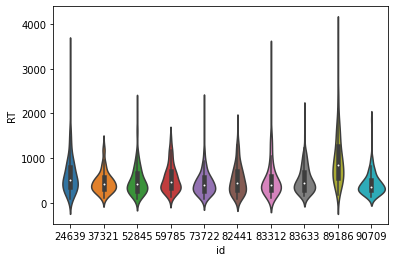

In [7]:
#plot RT by participant

sns.violinplot(x='id', y='RT', data=trials)
plt.show()

In [8]:
#mean/std per participant

pmeans = trials.groupby(by=['id']).aggregate(
    mean_RT=pd.NamedAgg('RT', np.mean),
    std_RT=pd.NamedAgg('RT', np.std))
pmeans.reset_index(inplace=True)
pmeans.head(5)

,id,mean_RT,std_RT
0,24639,633.663046,436.177940
1,37321,472.409949,242.907653
2,52845,512.443818,338.984475
3,59785,554.964478,303.579879
4,73722,472.881895,316.767257


In [18]:
#ttest per participant: base=mean RT of all participants

print(participants['id'])
base = np.mean(trials_NA["RT"])

for id in participants['id']:
    id = trials.loc[trials['id']==id,'RT']
    print(stats.ttest_1samp(a=id, popmean=base))

0    83633
1    82441
2    89186
3    37321
4    24639
5    52845
6    73722
7    59785
8    83312
9    90709
Name: id, dtype: int64
Ttest_1sampResult(statistic=-1.2325889364810627, pvalue=0.22015878860024385)
Ttest_1sampResult(statistic=-1.1136492686548942, pvalue=0.2676740442581706)
Ttest_1sampResult(statistic=7.989298564118981, pvalue=9.742924724673562e-13)
Ttest_1sampResult(statistic=-4.19201956429333, pvalue=5.342160902406916e-05)
Ttest_1sampResult(statistic=1.715275974329446, pvalue=0.08889736098647308)
Ttest_1sampResult(statistic=-1.7101803104279796, pvalue=0.08983855239846819)
Ttest_1sampResult(statistic=-3.1982589998639375, pvalue=0.0017718454852333689)
Ttest_1sampResult(statistic=-0.37530181918302535, pvalue=0.7081041136647246)
Ttest_1sampResult(statistic=-0.9067679722482412, pvalue=0.3663619748320043)
Ttest_1sampResult(statistic=-6.150068617663439, pvalue=1.070379428145071e-08)
